In [1]:
# Dependences and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

In [2]:
# Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millennials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millennials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [4]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Calculate the percentage of each group

# Percentage of Millennials
millennials_count = organized_df.loc[organized_df["Age Groups"] == "Millennials"].shape[0]
total_count = len(organized_df["Age Groups"])
millennials_percent = (millennials_count/total_count) * 100

# Percentage of GenZ
GenZ_count = organized_df.loc[organized_df["Age Groups"] == "Gen Z"].shape[0]
total_count = len(organized_df["Age Groups"])
GenZ_percent = (GenZ_count/total_count) * 100

# Percentage of GenX
GenX_count = organized_df.loc[organized_df["Age Groups"] == "Gen X"].shape[0]
total_count = len(organized_df["Age Groups"])
GenX_percent = (GenX_count/total_count) * 100

# Percentage of Baby Boomers
Baby_count = organized_df.loc[organized_df["Age Groups"] == "Baby Boomer"].shape[0]
total_count = len(organized_df["Age Groups"])
Baby_percent = (Baby_count/total_count) * 100

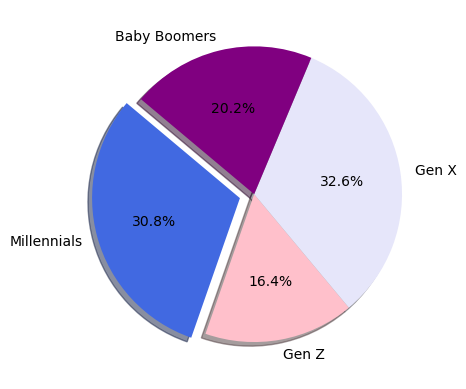

In [6]:
# Establish data for the pie chart
labels = ["Millennials", "Gen Z", "Gen X", "Baby Boomers"]
sizes = [millennials_percent, GenZ_percent, GenX_percent, Baby_percent]
colors = ['royalblue','pink','lavender','purple']
explode = (0.1, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [7]:
# organized_df.to_csv("output_data/shopping_trends.csv", index_label="Customer ID")

In [8]:
gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())
gen_group_count

,Customer ID
Age Groups,
Gen Z,640
Millennials,1200
Gen X,1272
Baby Boomer,788


In [9]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [10]:
organized_df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [11]:
organized_df.groupby(["Age Groups"])["Gender"].value_counts()

Age Groups   Gender
Gen Z        Male      442
             Female    198
Millennials  Male      822
             Female    378
Gen X        Male      846
             Female    426
Baby Boomer  Male      542
             Female    246
Name: count, dtype: int64

In [12]:
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)
GenZ_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2010,2011,24,Gen Z,Male,Sweater,Clothing,21,Texas,M,Maroon,Summer,4.4,No,2-Day Shipping,No,No,3,Debit Card,Bi-Weekly
1664,1665,19,Gen Z,Male,Handbag,Accessories,53,Minnesota,M,Purple,Spring,5.0,No,Next Day Air,Yes,Yes,35,PayPal,Weekly
2388,2389,21,Gen Z,Male,Dress,Clothing,68,Alabama,M,Peach,Fall,4.1,No,Store Pickup,No,No,10,Debit Card,Annually
440,441,20,Gen Z,Male,Shirt,Clothing,89,Oklahoma,XL,Maroon,Winter,3.5,Yes,Store Pickup,Yes,Yes,34,Debit Card,Fortnightly
42,43,20,Gen Z,Male,Coat,Outerwear,100,Tennessee,M,Beige,Spring,4.1,Yes,Free Shipping,Yes,Yes,15,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1181,23,Gen Z,Male,Skirt,Clothing,23,Oregon,S,Beige,Spring,4.9,No,Standard,Yes,Yes,34,Cash,Monthly
1206,1207,22,Gen Z,Male,Handbag,Accessories,59,Mississippi,S,Cyan,Fall,3.0,No,Free Shipping,Yes,Yes,16,Venmo,Every 3 Months
557,558,18,Gen Z,Male,Shirt,Clothing,60,Alaska,M,White,Spring,2.9,Yes,Free Shipping,Yes,Yes,31,Debit Card,Weekly
1739,1740,21,Gen Z,Male,Jewelry,Accessories,98,Minnesota,L,Silver,Winter,4.2,No,Express,No,No,23,Cash,Weekly


In [13]:
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Male")].sample(n=198)
Mill_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1674,1675,35,Millennials,Male,Coat,Outerwear,56,Alaska,M,Peach,Winter,3.2,No,Free Shipping,Yes,Yes,10,Debit Card,Fortnightly
1333,1334,29,Millennials,Male,Pants,Clothing,69,Idaho,M,Lavender,Winter,2.7,No,Next Day Air,Yes,Yes,9,Bank Transfer,Quarterly
1526,1527,41,Millennials,Male,Jacket,Outerwear,22,Oklahoma,L,White,Summer,3.1,No,Next Day Air,Yes,Yes,27,PayPal,Monthly
312,313,38,Millennials,Male,Pants,Clothing,89,Massachusetts,L,Green,Spring,3.4,Yes,Next Day Air,Yes,Yes,6,PayPal,Annually
683,684,33,Millennials,Male,Sandals,Footwear,36,Michigan,S,Violet,Winter,2.7,Yes,Free Shipping,Yes,Yes,3,Bank Transfer,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2552,29,Millennials,Male,Shoes,Footwear,32,Minnesota,M,Maroon,Winter,4.1,No,Next Day Air,No,No,40,Debit Card,Annually
1325,1326,28,Millennials,Male,Backpack,Accessories,73,Oregon,L,Gold,Summer,3.5,No,Express,Yes,Yes,1,Cash,Monthly
2153,2154,35,Millennials,Male,Shirt,Clothing,94,Kentucky,M,Violet,Fall,4.2,No,Free Shipping,No,No,31,PayPal,Annually
1671,1672,31,Millennials,Male,Hoodie,Clothing,22,Utah,M,Olive,Winter,4.0,No,Free Shipping,Yes,Yes,25,Bank Transfer,Weekly


In [14]:
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male")].sample(n=198)
GenX_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2213,2214,54,Gen X,Male,Hat,Accessories,94,Hawaii,M,Maroon,Fall,2.9,No,Express,No,No,18,Debit Card,Quarterly
2070,2071,56,Gen X,Male,Jewelry,Accessories,88,Nebraska,XL,Red,Spring,3.1,No,Express,No,No,14,Cash,Monthly
785,786,46,Gen X,Male,Shorts,Clothing,62,Louisiana,S,Purple,Spring,4.0,Yes,Next Day Air,Yes,Yes,37,PayPal,Fortnightly
164,165,59,Gen X,Male,Handbag,Accessories,65,Delaware,S,Purple,Spring,2.6,Yes,Free Shipping,Yes,Yes,5,Credit Card,Fortnightly
864,865,51,Gen X,Male,Jeans,Clothing,59,Kentucky,S,Charcoal,Winter,3.9,Yes,Next Day Air,Yes,Yes,5,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,57,Gen X,Male,Dress,Clothing,26,Delaware,XL,Violet,Fall,3.3,Yes,Next Day Air,Yes,Yes,40,Bank Transfer,Monthly
1098,1099,49,Gen X,Male,Handbag,Accessories,98,Idaho,S,Turquoise,Spring,3.6,No,Next Day Air,Yes,Yes,27,Credit Card,Weekly
2424,2425,49,Gen X,Male,Jewelry,Accessories,57,Delaware,M,Peach,Winter,4.5,No,Next Day Air,No,No,28,Bank Transfer,Bi-Weekly
2015,2016,57,Gen X,Male,Belt,Accessories,82,Virginia,S,Pink,Summer,4.5,No,Next Day Air,No,No,8,Credit Card,Fortnightly


In [15]:
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male")].sample(n=198)
Baby_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2619,2620,68,Baby Boomer,Male,Pants,Clothing,40,Connecticut,L,Indigo,Winter,3.9,No,Free Shipping,No,No,47,Credit Card,Weekly
1001,1002,61,Baby Boomer,Male,Dress,Clothing,60,Washington,M,Orange,Fall,3.6,Yes,Standard,Yes,Yes,4,Debit Card,Fortnightly
2602,2603,65,Baby Boomer,Male,Coat,Outerwear,44,South Carolina,M,Black,Fall,2.9,No,Free Shipping,No,No,1,Venmo,Quarterly
1593,1594,61,Baby Boomer,Male,Dress,Clothing,95,Maryland,M,Black,Spring,4.9,No,2-Day Shipping,Yes,Yes,25,Bank Transfer,Monthly
1055,1056,70,Baby Boomer,Male,Jacket,Outerwear,27,Massachusetts,M,Orange,Spring,3.3,No,Next Day Air,Yes,Yes,24,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,2339,66,Baby Boomer,Male,Sneakers,Footwear,68,Georgia,S,Silver,Fall,4.0,No,Express,No,No,21,PayPal,Quarterly
522,523,65,Baby Boomer,Male,Gloves,Accessories,88,Minnesota,M,Blue,Spring,2.5,Yes,Store Pickup,Yes,Yes,37,Cash,Quarterly
1071,1072,61,Baby Boomer,Male,Hat,Accessories,81,Pennsylvania,M,Beige,Summer,2.6,No,Express,Yes,Yes,46,Credit Card,Monthly
1986,1987,62,Baby Boomer,Male,Coat,Outerwear,48,Arkansas,L,Green,Summer,3.4,No,2-Day Shipping,No,No,14,Venmo,Quarterly


In [16]:
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)
GenZ_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3719,3720,20,Gen Z,Female,Pants,Clothing,91,Pennsylvania,M,Red,Summer,4.1,No,Free Shipping,No,No,8,Bank Transfer,Every 3 Months
3146,3147,21,Gen Z,Female,Shirt,Clothing,83,Virginia,S,Yellow,Winter,4.9,No,Free Shipping,No,No,19,PayPal,Annually
2652,2653,23,Gen Z,Female,Shorts,Clothing,20,Maryland,L,Cyan,Summer,3.3,No,2-Day Shipping,No,No,46,Credit Card,Monthly
3660,3661,19,Gen Z,Female,Shoes,Footwear,74,Arkansas,L,Indigo,Winter,3.1,No,2-Day Shipping,No,No,13,Bank Transfer,Fortnightly
3111,3112,21,Gen Z,Female,Belt,Accessories,81,Kansas,XL,Indigo,Spring,4.9,No,Free Shipping,No,No,25,Debit Card,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,2969,26,Gen Z,Female,Sweater,Clothing,48,South Carolina,S,Gray,Fall,4.9,No,Express,No,No,25,Cash,Every 3 Months
3420,3421,19,Gen Z,Female,Hat,Accessories,60,Kentucky,M,Purple,Winter,3.4,No,Express,No,No,35,PayPal,Bi-Weekly
2664,2665,22,Gen Z,Female,Jewelry,Accessories,84,Illinois,L,Silver,Winter,3.2,No,Store Pickup,No,No,37,PayPal,Weekly
3733,3734,25,Gen Z,Female,Socks,Clothing,58,Illinois,M,Maroon,Fall,4.7,No,Next Day Air,No,No,6,Debit Card,Every 3 Months


In [17]:
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Female")].sample(n=198)
Mill_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3164,3165,40,Millennials,Female,Dress,Clothing,32,Arizona,L,Silver,Winter,2.6,No,Standard,No,No,16,Credit Card,Annually
3831,3832,36,Millennials,Female,Backpack,Accessories,86,Nevada,L,Silver,Spring,4.0,No,Next Day Air,No,No,16,Debit Card,Every 3 Months
3050,3051,31,Millennials,Female,Coat,Outerwear,76,Kentucky,S,Green,Spring,3.6,No,Standard,No,No,28,Venmo,Every 3 Months
3366,3367,38,Millennials,Female,Gloves,Accessories,65,North Carolina,M,Red,Spring,3.6,No,2-Day Shipping,No,No,47,Debit Card,Quarterly
2931,2932,36,Millennials,Female,Jewelry,Accessories,31,Alabama,M,Magenta,Fall,4.5,No,2-Day Shipping,No,No,49,Credit Card,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,3055,42,Millennials,Female,Boots,Footwear,70,New Hampshire,S,Magenta,Summer,4.9,No,2-Day Shipping,No,No,34,Venmo,Monthly
3497,3498,35,Millennials,Female,Handbag,Accessories,48,Colorado,M,Red,Spring,4.3,No,Store Pickup,No,No,16,Venmo,Every 3 Months
3169,3170,35,Millennials,Female,T-shirt,Clothing,59,Georgia,M,White,Fall,3.8,No,Free Shipping,No,No,3,Venmo,Weekly
2789,2790,28,Millennials,Female,Sweater,Clothing,85,North Carolina,L,Orange,Fall,5.0,No,Express,No,No,28,Credit Card,Bi-Weekly


In [18]:
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female")].sample(n=198)
GenX_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3263,3264,56,Gen X,Female,Shorts,Clothing,68,Vermont,S,Black,Fall,4.4,No,Express,No,No,31,Debit Card,Fortnightly
3194,3195,43,Gen X,Female,Sneakers,Footwear,52,Maryland,L,Gold,Summer,4.6,No,Standard,No,No,10,Credit Card,Bi-Weekly
3668,3669,59,Gen X,Female,Blouse,Clothing,71,Michigan,XL,Magenta,Summer,3.2,No,Store Pickup,No,No,18,Venmo,Annually
3214,3215,53,Gen X,Female,Skirt,Clothing,78,Washington,M,Yellow,Spring,3.1,No,Free Shipping,No,No,6,Debit Card,Annually
2899,2900,50,Gen X,Female,Boots,Footwear,64,Nebraska,M,Gold,Spring,4.2,No,2-Day Shipping,No,No,22,Bank Transfer,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,3502,53,Gen X,Female,Shoes,Footwear,87,Nebraska,M,Silver,Fall,4.8,No,Standard,No,No,43,Bank Transfer,Weekly
3105,3106,48,Gen X,Female,Skirt,Clothing,33,Oregon,M,Olive,Fall,2.7,No,Express,No,No,17,Debit Card,Monthly
2724,2725,52,Gen X,Female,Sneakers,Footwear,91,Missouri,M,Brown,Spring,2.5,No,Next Day Air,No,No,11,Debit Card,Fortnightly
3406,3407,57,Gen X,Female,Sweater,Clothing,79,Nebraska,M,Red,Spring,4.0,No,Store Pickup,No,No,24,Venmo,Quarterly


In [19]:
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female")].sample(n=198)
Baby_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3793,3794,62,Baby Boomer,Female,Sunglasses,Accessories,20,Delaware,M,Pink,Fall,4.0,No,Standard,No,No,46,Bank Transfer,Annually
3843,3844,64,Baby Boomer,Female,Hat,Accessories,71,Georgia,L,Silver,Winter,4.0,No,Free Shipping,No,No,48,Venmo,Every 3 Months
2759,2760,68,Baby Boomer,Female,Shoes,Footwear,59,Washington,M,Turquoise,Summer,3.9,No,Free Shipping,No,No,42,Cash,Every 3 Months
3433,3434,62,Baby Boomer,Female,Socks,Clothing,93,Alaska,M,Yellow,Spring,4.5,No,Free Shipping,No,No,28,PayPal,Annually
3630,3631,65,Baby Boomer,Female,Hat,Accessories,73,Oklahoma,M,Lavender,Winter,4.8,No,Store Pickup,No,No,29,Cash,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,3535,65,Baby Boomer,Female,Shoes,Footwear,83,Delaware,M,Gray,Fall,3.2,No,Express,No,No,7,Cash,Weekly
3592,3593,61,Baby Boomer,Female,Boots,Footwear,82,New Jersey,L,Lavender,Spring,4.4,No,2-Day Shipping,No,No,18,Venmo,Fortnightly
2710,2711,69,Baby Boomer,Female,Jacket,Outerwear,51,Wisconsin,L,Purple,Summer,4.7,No,Standard,No,No,3,Bank Transfer,Fortnightly
3430,3431,67,Baby Boomer,Female,Socks,Clothing,73,Montana,M,Lavender,Winter,4.2,No,Next Day Air,No,No,17,Bank Transfer,Every 3 Months


In [20]:
GenZ_male["Review Rating"]

2010    4.4
1664    5.0
2388    4.1
440     3.5
42      4.1
       ... 
1180    4.9
1206    3.0
557     2.9
1739    4.2
306     3.6
Name: Review Rating, Length: 198, dtype: float64

In [21]:
Mill_male["Review Rating"]

1674    3.2
1333    2.7
1526    3.1
312     3.4
683     2.7
       ... 
2551    4.1
1325    3.5
2153    4.2
1671    4.0
716     3.6
Name: Review Rating, Length: 198, dtype: float64

In [22]:
GenX_male["Review Rating"]

2213    2.9
2070    3.1
785     4.0
164     2.6
864     3.9
       ... 
291     3.3
1098    3.6
2424    4.5
2015    4.5
2444    3.7
Name: Review Rating, Length: 198, dtype: float64

In [23]:
Baby_male["Review Rating"]

2619    3.9
1001    3.6
2602    2.9
1593    4.9
1055    3.3
       ... 
2338    4.0
522     2.5
1071    2.6
1986    3.4
2371    3.7
Name: Review Rating, Length: 198, dtype: float64

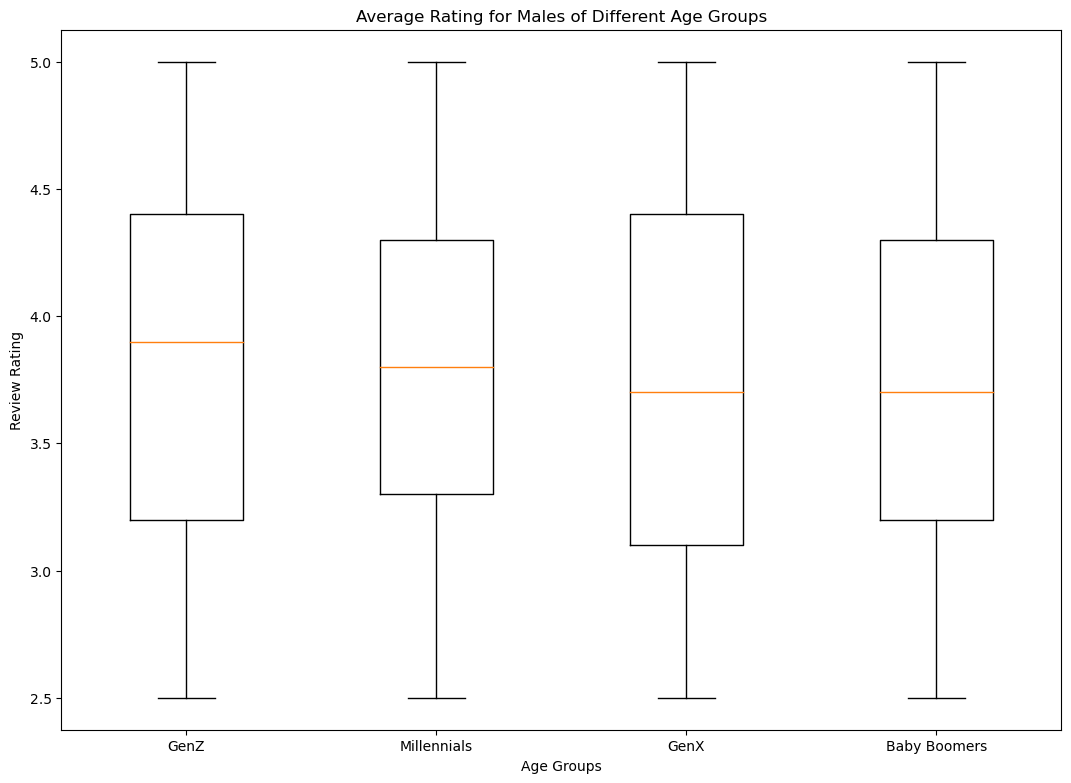

In [24]:
# Box and Whisker plot for Males of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_male["Review Rating"]
data_2 = Mill_male["Review Rating"]
data_3 = GenX_male["Review Rating"]
data_4 = Baby_male["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Males of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

In [25]:
GenZ_female["Review Rating"]

3719    4.1
3146    4.9
2652    3.3
3660    3.1
3111    4.9
       ... 
2968    4.9
3420    3.4
2664    3.2
3733    4.7
3540    4.6
Name: Review Rating, Length: 198, dtype: float64

In [26]:
Mill_female["Review Rating"]

3164    2.6
3831    4.0
3050    3.6
3366    3.6
2931    4.5
       ... 
3054    4.9
3497    4.3
3169    3.8
2789    5.0
3305    4.9
Name: Review Rating, Length: 198, dtype: float64

In [27]:
GenX_female["Review Rating"]

3263    4.4
3194    4.6
3668    3.2
3214    3.1
2899    4.2
       ... 
3501    4.8
3105    2.7
2724    2.5
3406    4.0
3617    4.3
Name: Review Rating, Length: 198, dtype: float64

In [28]:
Baby_female["Review Rating"]

3793    4.0
3843    4.0
2759    3.9
3433    4.5
3630    4.8
       ... 
3534    3.2
3592    4.4
2710    4.7
3430    4.2
2702    4.0
Name: Review Rating, Length: 198, dtype: float64

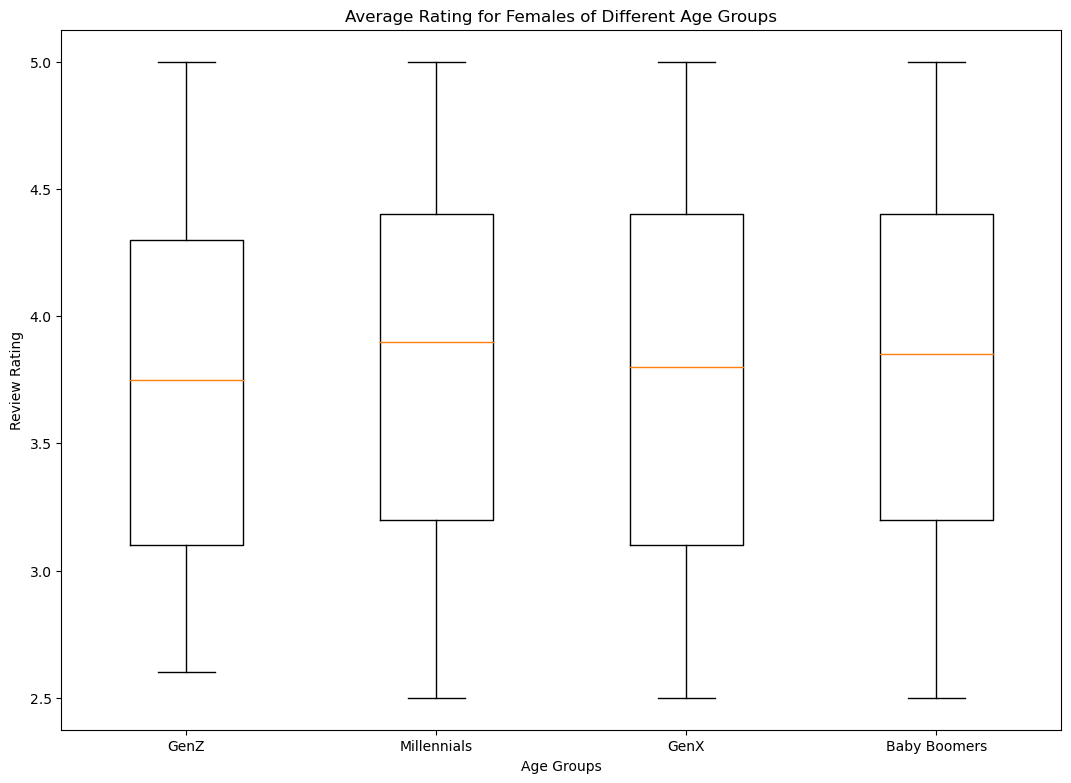

In [29]:
# Box and Whisker plot for Females of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_female["Review Rating"]
data_2 = Mill_female["Review Rating"]
data_3 = GenX_female["Review Rating"]
data_4 = Baby_female["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Females of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

In [30]:
## What type of clothing is purchased for each season work below this line ##

In [31]:
organized_df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [32]:
organized_df.groupby(["Category"])["Season"].value_counts()

Category     Season
Accessories  Fall      324
             Summer    312
             Winter    303
             Spring    301
Clothing     Spring    454
             Winter    448
             Fall      427
             Summer    408
Footwear     Spring    163
             Summer    160
             Winter    140
             Fall      136
Outerwear    Fall       88
             Spring     81
             Winter     80
             Summer     75
Name: count, dtype: int64

In [33]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
29,30,31,Millennials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually
3882,3883,35,Millennials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly
3883,3884,34,Millennials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly


In [34]:
# Filter the DataFrame down only to those columns to chart
fall_category = fall_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
fall_category_counts = fall_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
fall_category_counts = fall_category_counts.unstack()

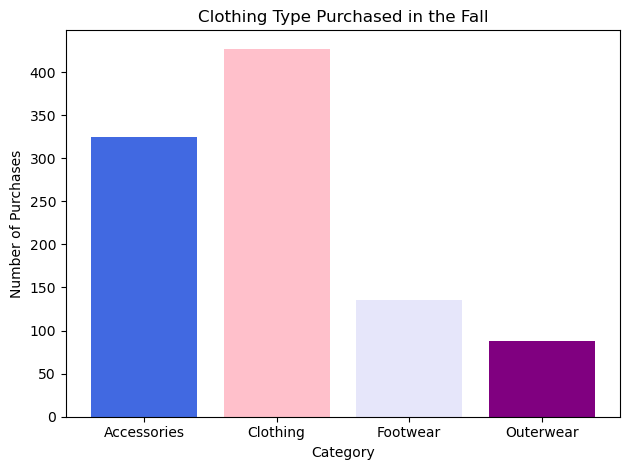

In [35]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(fall_category_counts.T.index, fall_category_counts.T["Fall"], color = color)
plt.title("Clothing Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [36]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
7,8,27,Millennials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,12,30,Millennials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly
3880,3881,42,Millennials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly
3890,3891,35,Millennials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually


In [37]:
# Filter the DataFrame down only to those columns to chart
winter_category = winter_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
winter_category_counts = winter_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
winter_category_counts = winter_category_counts.unstack()

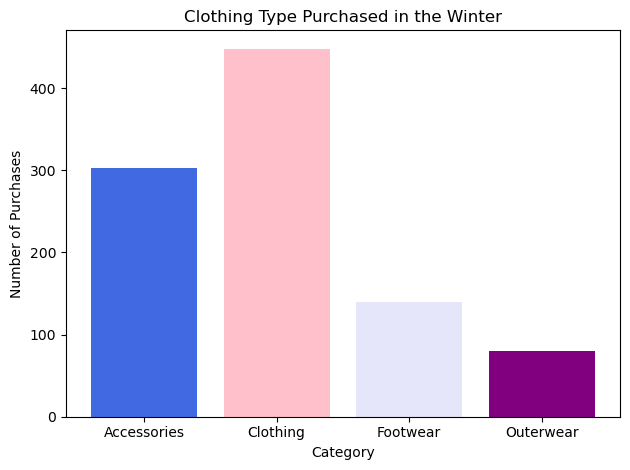

In [38]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(winter_category_counts.T.index, winter_category_counts.T["Winter"], color = color)
plt.title("Clothing Type Purchased in the Winter")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [39]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [40]:
# Filter the DataFrame down only to those columns to chart
spring_category = spring_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
spring_category_counts = spring_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
spring_category_counts = spring_category_counts.unstack()

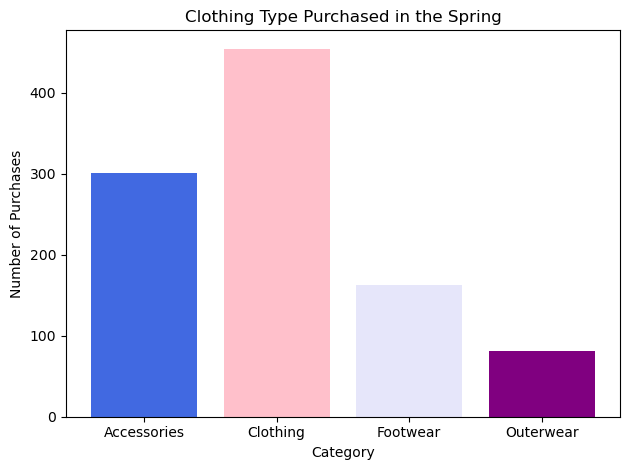

In [41]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(spring_category_counts.T.index, spring_category_counts.T["Spring"], color = color)
plt.title("Clothing Type Purchased in the Spring")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [42]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millennials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millennials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [43]:
# Filter the DataFrame down only to those columns to chart
summer_category = summer_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
summer_category_counts = summer_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
summer_category_counts = summer_category_counts.unstack()

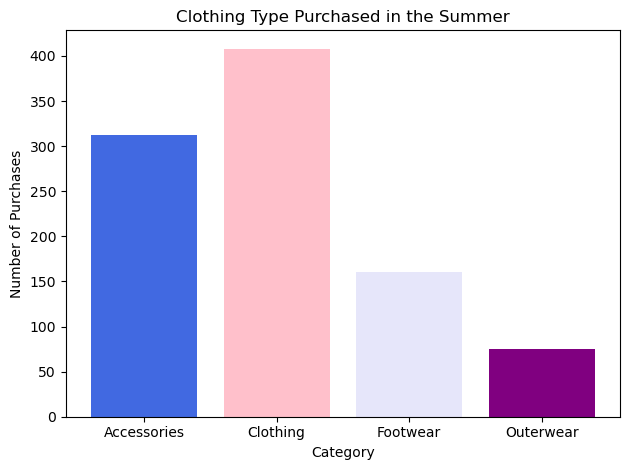

In [44]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(summer_category_counts.T.index, summer_category_counts.T["Summer"], color = color)
plt.title("Clothing Type Purchased in the Summer")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

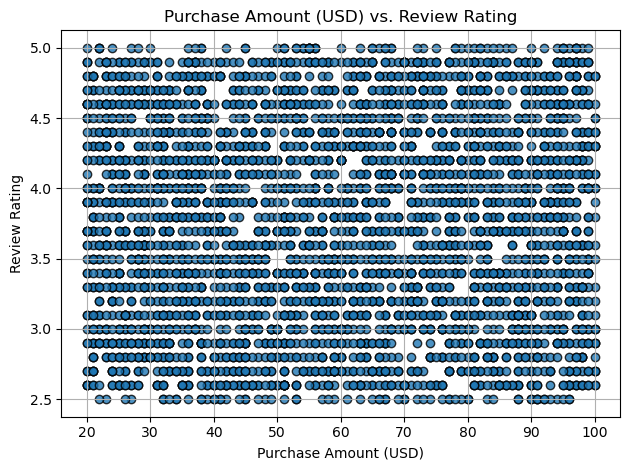

In [45]:
## Is there a relationship between review rating and purchase amount? ##

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Review Rating"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Review Rating")
plt.title("Purchase Amount (USD) vs. Review Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

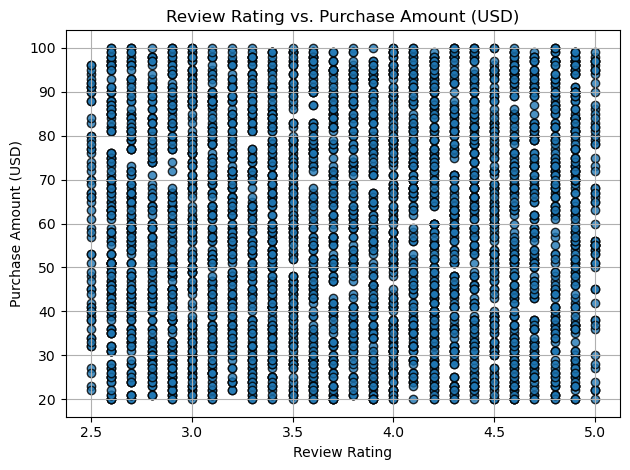

In [46]:
## Is there a relationship between purchase amount and review rating? ##

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Review Rating"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Review Rating")
plt.ylabel("Purchase Amount (USD)")
plt.title("Review Rating vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

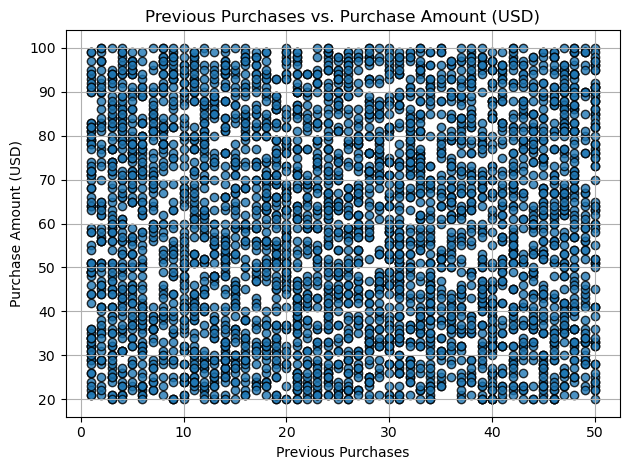

In [47]:
## Is there a relationship between Previous Purchases and number of Purchase Amount (USD)?

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Previous Purchases"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.title("Previous Purchases vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

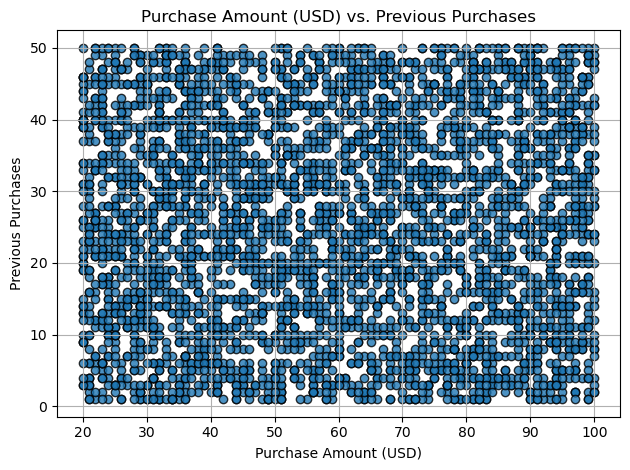

In [48]:
## Is there a relationship between Purchase Amount (USD) and number of Previous Purchases?

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Previous Purchases"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.title("Purchase Amount (USD) vs. Previous Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
## Which age demographic spends the most money?

average_spent_by_age_group = organized_df.groupby('Age Groups')['Purchase Amount (USD)'].mean().reset_index()
average_spent_by_age_group

,Age Groups,Purchase Amount (USD)
0,Gen Z,60.690625
1,Millennials,59.390833
2,Gen X,59.808176
3,Baby Boomer,59.510152


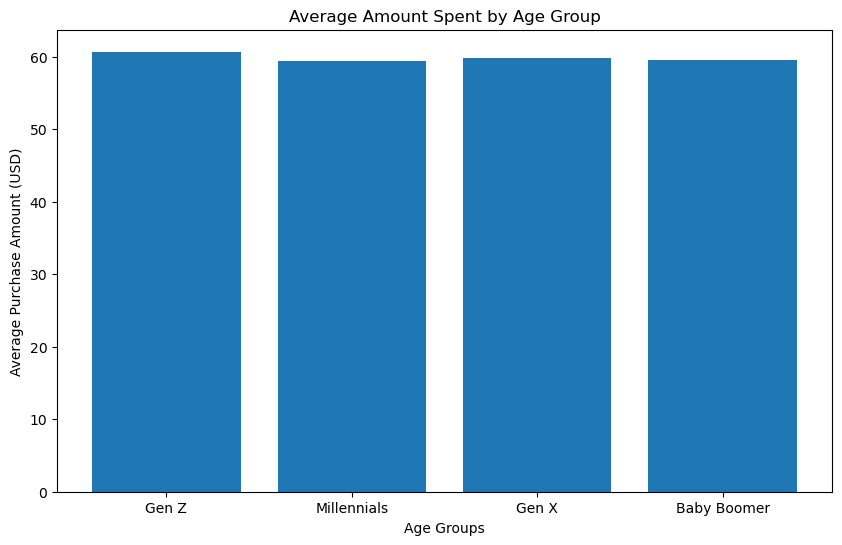

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(average_spent_by_age_group['Age Groups'], average_spent_by_age_group["Purchase Amount (USD)"])
plt.xlabel('Age Groups')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Amount Spent by Age Group')
plt.show()

In [51]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [52]:
## How frequently do specific age demographics shop? (bi-weekly, bi-monthly, ect)

shopping_frequency = organized_df.pivot_table(index='Frequency of Purchases', columns='Age Groups', aggfunc='size', fill_value=0)
shopping_frequency

Age Groups,Gen Z,Millennials,Gen X,Baby Boomer
Frequency of Purchases,,,,
Annually,102,169,170,131
Bi-Weekly,99,165,184,99
Every 3 Months,100,186,185,113
Fortnightly,94,164,180,104
Monthly,80,179,189,105
Quarterly,89,161,185,128
Weekly,76,176,179,108


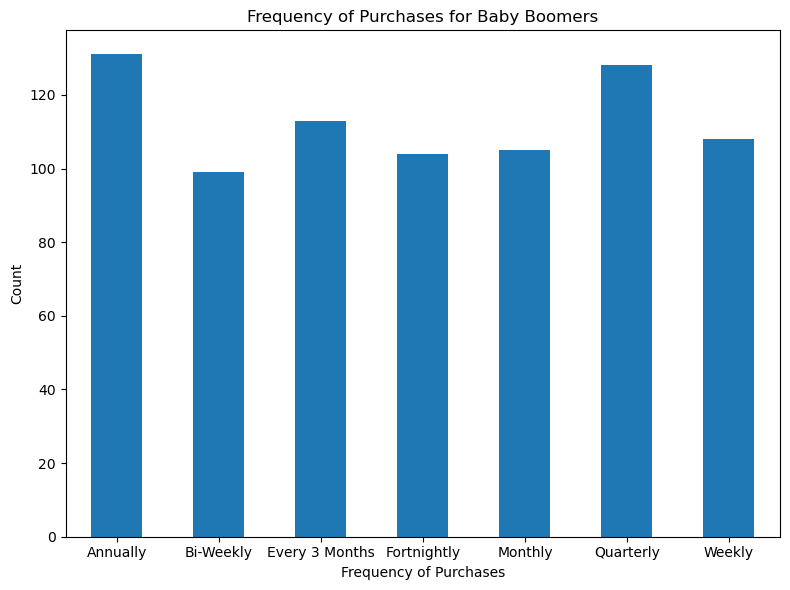

In [53]:
baby_boomer_data = shopping_frequency.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Baby Boomers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

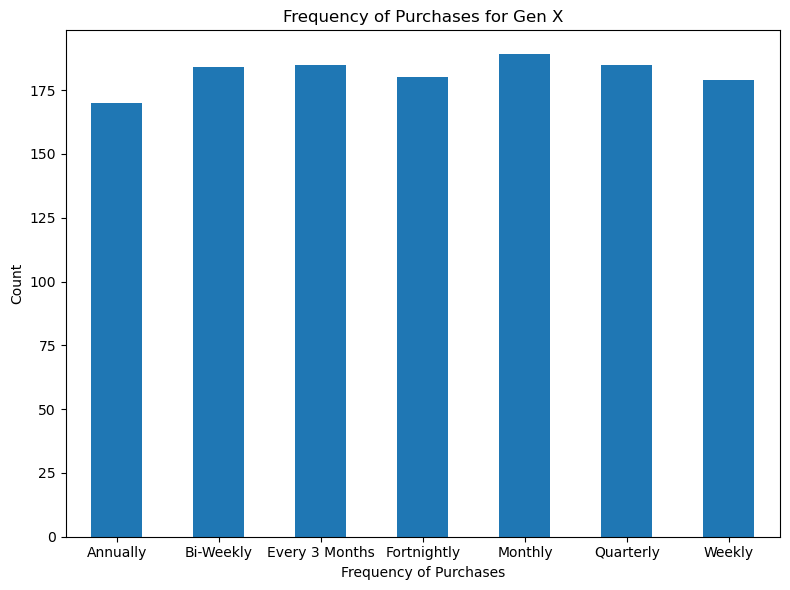

In [54]:
gen_x_data = shopping_frequency.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
gen_x_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen X')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

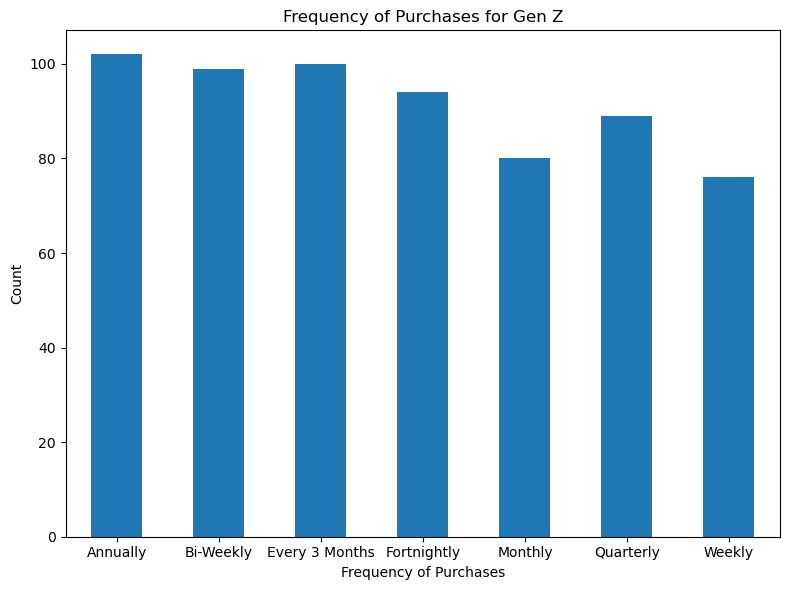

In [55]:
gen_z_data = shopping_frequency.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
gen_z_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen Z')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

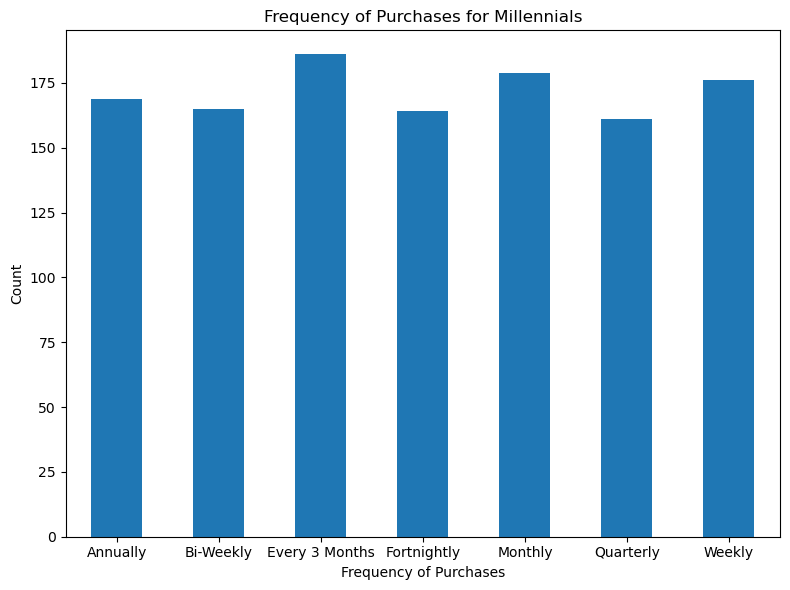

In [56]:
millennial_data = shopping_frequency.loc[:, 'Millennials']
plt.figure(figsize=(8, 6))
millennial_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Millennials')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
frequency_counts = organized_df['Frequency of Purchases'].value_counts().reset_index()
frequency_counts.columns = ['Frequency of Purchases', 'Count']
print(frequency_counts)

  Frequency of Purchases  Count
0         Every 3 Months    584
1               Annually    572
2              Quarterly    563
3                Monthly    553
4              Bi-Weekly    547
5            Fortnightly    542
6                 Weekly    539


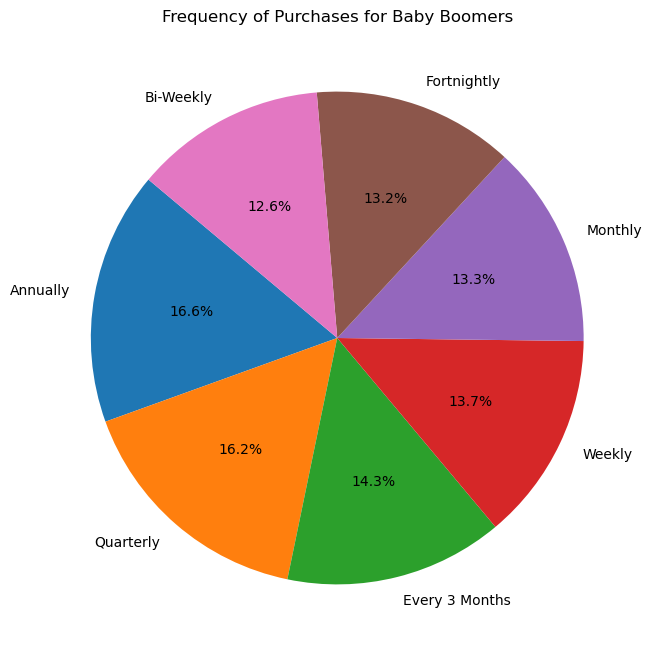

In [58]:
baby_boomers_df = organized_df[shopping_df['Age Groups'] == 'Baby Boomer']
baby_boomers_frequency_counts = baby_boomers_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(baby_boomers_frequency_counts, labels=baby_boomers_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Baby Boomers')
plt.show()

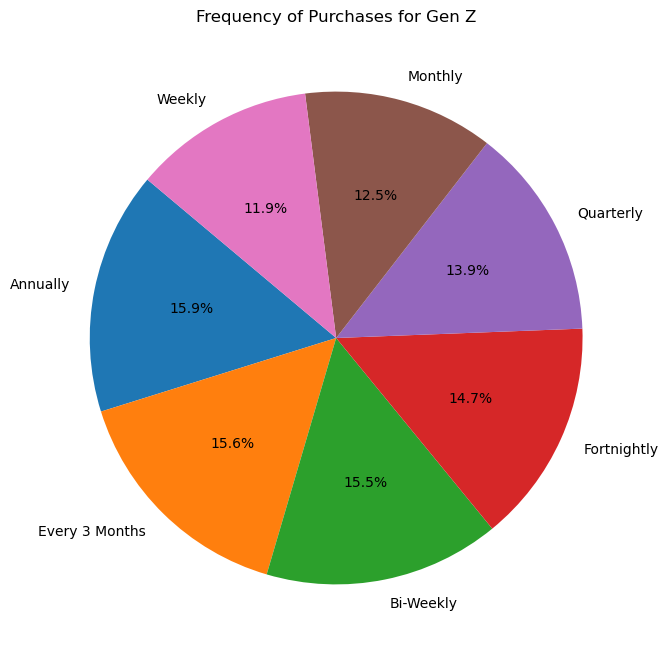

In [59]:
gen_z_df = organized_df[organized_df['Age Groups'] == 'Gen Z']
gen_z_frequency_counts = gen_z_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_z_frequency_counts, labels=gen_z_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen Z')
plt.show()

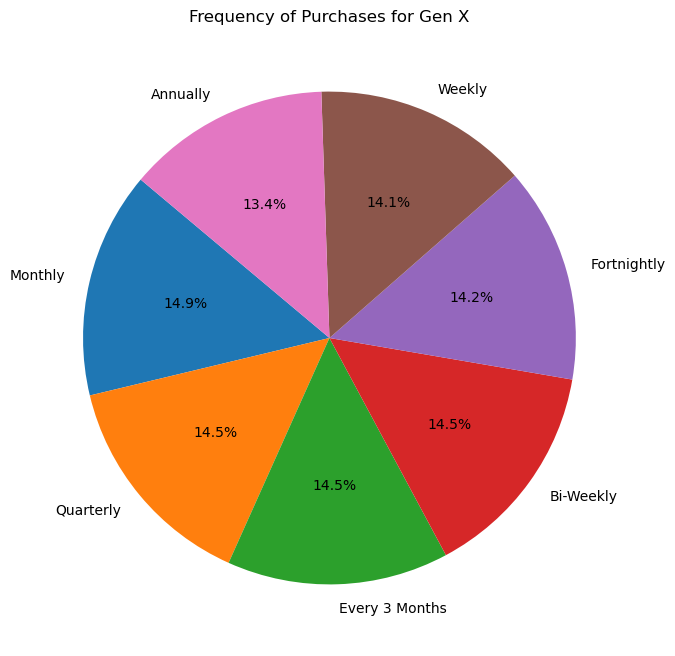

In [60]:
gen_x_df = organized_df[organized_df['Age Groups'] == 'Gen X']
gen_x_frequency_counts = gen_x_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_x_frequency_counts, labels=gen_x_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen X')
plt.show()

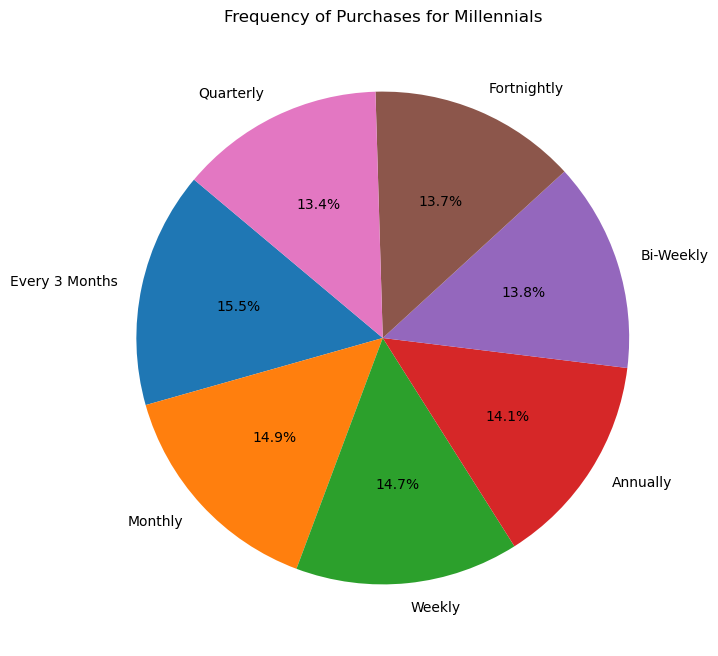

In [61]:
millennial_df = organized_df[organized_df['Age Groups'] == 'Millennials']
millennial_frequency_counts = millennial_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(millennial_frequency_counts, labels=millennial_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Millennials')
plt.show()

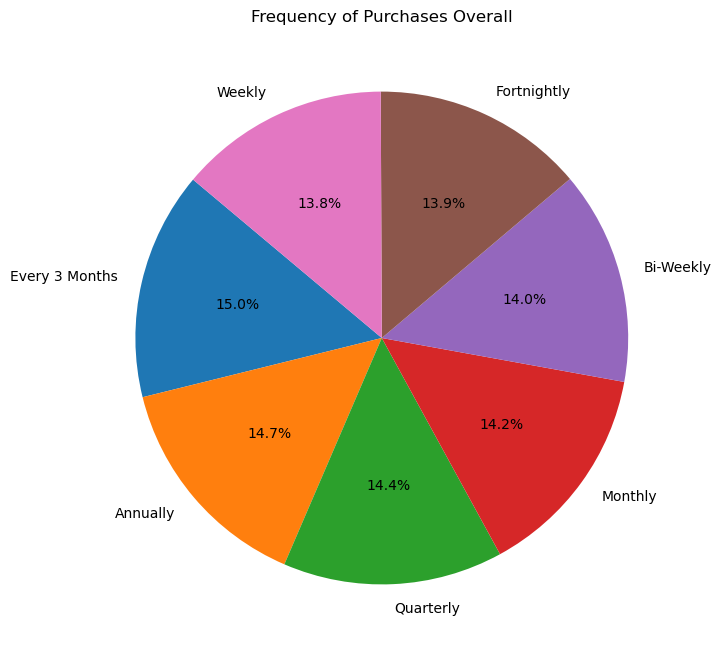

In [62]:
overall_frequency_counts = organized_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(overall_frequency_counts, labels=overall_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases Overall')
plt.show()